In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np

In [2]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [3]:
df

,data1,data2,key1,key2
0,0.056021,-0.189142,a,one
1,0.391330,0.352484,a,two
2,1.066581,-0.373131,b,one
3,-0.093867,-0.201158,b,two
4,1.359266,-1.565131,a,one


In [5]:
grouped = df['data1'].groupby(df['key1'])
# groupBy技术，这里变量grouped是一个GroupBY对象，没有进行任何计算
grouped

In [6]:
grouped.mean() # 计算分组平均值

key1
a    0.602206
b    0.486357
Name: data1, dtype: float64

In [7]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
# 一次传入多个分组

In [8]:
means # 层次索引，数据Series

key1  key2
a     one     0.707644
      two     0.391330
b     one     1.066581
      two    -0.093867
Name: data1, dtype: float64

In [14]:
years = np.array([2005,2005,2006,2005,2006])

In [10]:
df['data1'].groupby(years).mean()
# 分组键可以是任何长度适当的数组，例如years

2005    0.117828
2006    1.212924
Name: data1, dtype: float64

In [15]:
# size，返回一个含有分组大小的Series
df['data1'].groupby(years).size()

2005    3
2006    2
Name: data1, dtype: int64

In [17]:
for name,group in df.groupby('key1'): # GB支持迭代
    print name
    print group

a
      data1     data2 key1 key2
0  0.056021 -0.189142    a  one
1  0.391330  0.352484    a  two
4  1.359266 -1.565131    a  one
b
      data1     data2 key1 key2
2  1.066581 -0.373131    b  one
3 -0.093867 -0.201158    b  two


In [18]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [19]:
df.groupby(['key1','key2'])['data2'].mean()
# 选取一个或一组列

key1  key2
a     one    -0.877137
      two     0.352484
b     one    -0.373131
      two    -0.201158
Name: data2, dtype: float64

In [20]:
people = DataFrame(np.random.randn(5,5),
                  columns=['a','b','c','d','e'],
                  index=['joe','steve','wes','jim','travis'])

In [22]:
people.ix[2:3,['b','c']] = np.nan

In [23]:
people

,a,b,c,d,e
joe,-0.040148,0.593120,1.718556,0.264861,1.755277
steve,-0.402168,-1.004816,-0.943170,0.983393,0.376582
wes,0.211007,NaN,NaN,-0.566272,0.706855
jim,-0.859569,0.122192,0.260423,0.558500,0.157005
travis,2.158851,-0.160567,2.046469,0.917555,0.572640


In [31]:
mapping = {'a':'red','b':'read','c':'blue','d':'blue','e':'red'}

In [33]:
by = people.groupby(mapping,axis=1)
# 通过字典分组

In [34]:
by.sum()

,blue,read,red
joe,1.983417,0.593120,1.715129
steve,0.040223,-1.004816,-0.025586
wes,-0.566272,NaN,0.917862
jim,0.818922,0.122192,-0.702564
travis,2.964024,-0.160567,2.731491


In [35]:
people.groupby(len).sum() # 通过函数进行分组

,a,b,c,d,e
3,-0.688710,0.715312,1.978979,0.257089,2.619137
5,-0.402168,-1.004816,-0.943170,0.983393,0.376582
6,2.158851,-0.160567,2.046469,0.917555,0.572640


In [37]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                    [1,3,5,1,3]],names=['city','tenor'])
hier_df = DataFrame(np.random.randn(4,5),columns=columns)

In [38]:
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0     -0.781258 -1.429994 -1.725745 -0.017374 -0.429424
1      1.224755 -0.211067 -0.552045 -1.682455 -1.446646
2      0.029682  0.996099  1.068628  0.541335 -0.155491
3     -0.421493 -0.515786 -0.099930 -0.293892  2.189104

In [41]:
hier_df.groupby(level='tenor',axis=1).count() # 根据索引级别分组

tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


In [42]:
df

,data1,data2,key1,key2
0,0.056021,-0.189142,a,one
1,0.391330,0.352484,a,two
2,1.066581,-0.373131,b,one
3,-0.093867,-0.201158,b,two
4,1.359266,-1.565131,a,one


In [43]:
df.groupby('key1')['data1'].quantile(0.9) #数据聚合

key1
a    1.165679
b    0.950537
Name: data1, dtype: float64

In [23]:
tips = pd.read_csv('C:\Users\jiao.fang.jiaofang\Desktop\data\pydata-book-master\ch08\\tips.csv')

In [47]:
tips[:6]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [48]:
grouped = tips.groupby(['sex','smoker'])

In [51]:
grouped_tip = grouped['tip']

In [54]:
grouped_tip.agg(['mean','sum','count']) #数据聚合，面向列的多函数应用

mean     sum  count
sex    smoker                         
Female No      2.773519  149.77     54
       Yes     2.931515   96.74     33
Male   No      3.113402  302.00     97
       Yes     3.051167  183.07     60

In [55]:
df

,data1,data2,key1,key2
0,0.056021,-0.189142,a,one
1,0.391330,0.352484,a,two
2,1.066581,-0.373131,b,one
3,-0.093867,-0.201158,b,two
4,1.359266,-1.565131,a,one


In [56]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [57]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.602206,-0.467263
b,0.486357,-0.287144


In [60]:
pd.merge(df,k1_means,left_on='key1',right_index=True) #先聚合在合并

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.056021,-0.189142,a,one,0.602206,-0.467263
1,0.391330,0.352484,a,two,0.602206,-0.467263
4,1.359266,-1.565131,a,one,0.602206,-0.467263
2,1.066581,-0.373131,b,one,0.486357,-0.287144
3,-0.093867,-0.201158,b,two,0.486357,-0.287144


In [61]:
people

,a,b,c,d,e
joe,-0.040148,0.593120,1.718556,0.264861,1.755277
steve,-0.402168,-1.004816,-0.943170,0.983393,0.376582
wes,0.211007,NaN,NaN,-0.566272,0.706855
jim,-0.859569,0.122192,0.260423,0.558500,0.157005
travis,2.158851,-0.160567,2.046469,0.917555,0.572640


In [62]:
key = ['one','two','one','two','one']

In [64]:
people.groupby(key).mean()

,a,b,c,d,e
one,0.776570,0.216276,1.882512,0.205382,1.011591
two,-0.630868,-0.441312,-0.341374,0.770946,0.266793


In [65]:
people.groupby(key).transform(np.mean) # 各分组产生的变量值，会被广播出去

,a,b,c,d,e
joe,0.776570,0.216276,1.882512,0.205382,1.011591
steve,-0.630868,-0.441312,-0.341374,0.770946,0.266793
wes,0.776570,0.216276,1.882512,0.205382,1.011591
jim,-0.630868,-0.441312,-0.341374,0.770946,0.266793
travis,0.776570,0.216276,1.882512,0.205382,1.011591


In [71]:
def top(df,n=5,column='tip'):
    return df.sort_values(by=column)[-n:]

In [72]:
top(tips,n=6)

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.50,Female,Yes,Sat,Dinner,3
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3


In [73]:
tips.groupby('smoker').apply(top)

total_bill    tip     sex smoker   day    time  size
smoker                                                          
No     47        32.40   6.00    Male     No   Sun  Dinner     4
       141       34.30   6.70    Male     No  Thur   Lunch     6
       59        48.27   6.73    Male     No   Sat  Dinner     4
       23        39.42   7.58    Male     No   Sat  Dinner     4
       212       48.33   9.00    Male     No   Sat  Dinner     4
Yes    211       25.89   5.16    Male    Yes   Sat  Dinner     4
       181       23.33   5.65    Male    Yes   Sun  Dinner     2
       214       28.17   6.50  Female    Yes   Sat  Dinner     3
       183       23.17   6.50    Male    Yes   Sun  Dinner     4
       170       50.81  10.00    Male    Yes   Sat  Dinner     3

In [74]:
#用特定值填充缺失值
s = Series(np.random.randn(6))
s[::2] = np.nan


In [75]:
s

0         NaN
1    1.036014
2         NaN
3   -1.585049
4         NaN
5    0.322341
dtype: float64

In [76]:
s.fillna(s.mean()) # 填充平均值

0   -0.075565
1    1.036014
2   -0.075565
3   -1.585049
4   -0.075565
5    0.322341
dtype: float64

In [78]:
states = ['oh','ny','vm','fl','og','nd']
group_key = ['east']*3 + ['west']*3
data = Series(np.random.randn(6),index=states)
data['ny','fl','nd'] = np.nan
data

oh    0.595486
ny         NaN
vm    0.249749
fl         NaN
og   -0.557728
nd         NaN
dtype: float64

In [79]:
data.groupby(group_key).mean()

east    0.422618
west   -0.557728
dtype: float64

In [81]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean) 
# 不同分组填充不同值

oh    0.595486
ny    0.422618
vm    0.249749
fl   -0.557728
og   -0.557728
nd   -0.557728
dtype: float64

In [4]:
# 随机采样与排列
suits = ['H','S','C','D'] # 代表一副扑克牌的花色
card_val = (range(1,11) + [10]*3)*4 # 总共52张牌
base_names = ['A'] + range(2,11) + ['J','K','Q'] # 每种花色的牌类
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names) # 给各种花色牌命名
deck = Series(card_val,index=cards)

In [5]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [6]:
def draw(deck,n=5): #从一副牌中任意抽取5张牌
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

QC    10
8D     8
8S     8
5D     5
6C     6
dtype: int64

In [8]:
get_suit = lambda card:card[-1] #只要最后一个字母
deck.groupby(get_suit).apply(draw,n=2) # 每个花色选取两张牌

C  10C    10
   QC     10
D  8D      8
   7D      7
H  4H      4
   AH      1
S  2S      2
   4S      4
dtype: int64

In [9]:
# 分组加权平均数和相关系数
df = DataFrame({'category':['a','a','a','a','b','b','b','b'],
               'data':np.random.randn(8),
               'weight':np.random.rand(8)})

In [10]:
df

,category,data,weight
0,a,1.610599,0.534749
1,a,-1.020751,0.792827
2,a,1.110529,0.630515
3,a,-0.339113,0.156043
4,b,-1.186424,0.367011
5,b,0.599981,0.886482
6,b,0.518822,0.292890
7,b,0.284567,0.594521


In [15]:
grouped = df.groupby('category') 
get_wavg = lambda g:np.average(g['data'],weights=g['weight']) # ????,加权平均数
grouped.apply(get_wavg)

category
a    0.330762
b    0.195048
dtype: float64

In [16]:
close_px = pd.read_csv('C:\Users\jiao.fang.jiaofang\Desktop\data\pydata-book-master\ch09\stock_px.csv')

In [18]:
close_px[-4:]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66
2213,2011-10-14 00:00:00,422.00,27.27,78.11,1224.58


In [22]:
# 计算日收益与SPX之间的年度相关系数组成的DataFrame
rets = close_px.dropna() #去掉NAN数值
spx_corr = lambda x: x.corrwith(x['SPX']) #相关系数
by_year = rets.groupby(lambda x: x.year)

AttributeError: 'long' object has no attribute 'year'

In [31]:
# 透视表和交叉表
pd.pivot_table(tips,index=['sex','smoker'])

size       tip  total_bill
sex    smoker                                
Female No      2.592593  2.773519   18.105185
       Yes     2.242424  2.931515   17.977879
Male   No      2.711340  3.113402   19.791237
       Yes     2.500000  3.051167   22.284500

In [42]:
# 透视表
pd.pivot_table(tips,index=['sex','day'],values=['tip','size'],columns='smoker',
               fill_value=0,aggfunc=len,margins=True)

size                 tip             
smoker          No   Yes    All     No   Yes    All
sex    day                                         
Female Fri     2.0   7.0    9.0    2.0   7.0    9.0
       Sat    13.0  15.0   28.0   13.0  15.0   28.0
       Sun    14.0   4.0   18.0   14.0   4.0   18.0
       Thur   25.0   7.0   32.0   25.0   7.0   32.0
Male   Fri     2.0   8.0   10.0    2.0   8.0   10.0
       Sat    32.0  27.0   59.0   32.0  27.0   59.0
       Sun    43.0  15.0   58.0   43.0  15.0   58.0
       Thur   20.0  10.0   30.0   20.0  10.0   30.0
All          151.0  93.0  244.0  151.0  93.0  244.0

In [44]:
# 交叉表
data = DataFrame({'sample':range(6),
                 'gender':['f','m','f','m','m','m'],
                 'hander':['r','l','r','r','r','l']})


In [45]:
data

,gender,hander,sample
0,f,r,0
1,m,l,1
2,f,r,2
3,m,r,3
4,m,r,4
5,m,l,5


In [46]:
pd.crosstab(data.gender,data.hander,margins=True)

hander,l,r,All
gender,,,
f,0,2,2
m,2,2,4
All,2,4,6


In [49]:
# 2012联邦选举委员会数据库
fec = pd.read_csv('C:\Users\jiao.fang.jiaofang\Desktop\data\pydata-book-master\ch09\P00000001-ALL.csv')

In [50]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [51]:
unique_cands = fec.cand_nm.unique() #整理出竞选候选人，并分出党派
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [52]:
parties = {'Bachmann, Michelle':'Republican',
           'Romney, Mitt':'Republican',
           'Obama, Barack':'Democrat',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Pawlenty, Timothy':'Republican',
           'Johnson, Gary Earl':'Republican',
           'Paul, Ron': 'Republican',
           'Santorum, Rick':'Republican',
           'Cain, Herman':'Republican',
           'Gingrich, Newt':'Republican',
           'McCotter, Thaddeus G':'Republican',
           'Huntsman, Jon':'Republican',
           'Perry, Rick':'Republican'}

In [53]:
fec.cand_nm[123456:23461]

Series([], Name: cand_nm, dtype: object)

In [54]:
fec['party'] = fec.cand_nm.map(parties) # 为其添加新列

In [57]:
fec = fec[fec.contb_receipt_amt > 0] # 只取数据集为正的出资额

In [59]:
fec.contbr_occupation.value_counts() # 捐款职业

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

In [74]:
occ_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
              'INFORMATION REQUESTED':'NOT PROVIDED',
              'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
              'C.E.O.':'CEO'}
# 如果没有提供相关映射，则返回x
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [75]:
emp_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
              'INFORMATION REQUESTED':'NOT PROVIDED',
              'SELF':'SELF-EMPLOYED',
              'SELF EMPLOTED':'SELF-EMPLOYED'}
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [76]:
# 根据党派和职业对数据聚合
by_occupation = pd.pivot_table(fec,index='contbr_occupation',columns='party',
               values='contb_receipt_amt',aggfunc='sum')

In [77]:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2075974.79,4.233742e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


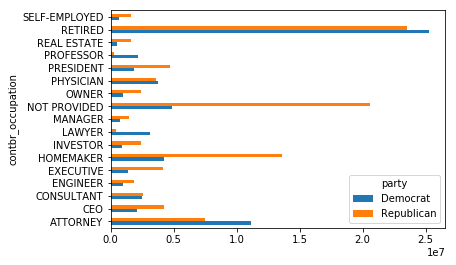

In [78]:
% matplotlib inline
over_2mm.plot(kind='barh')

In [79]:
# 离散化到多个面元，cut
bins = np.array([0,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec.contb_receipt_amt,bins)
labels

0            (100, 1000]
1              (10, 100]
2            (100, 1000]
3            (100, 1000]
4            (100, 1000]
5            (100, 1000]
6            (100, 1000]
7            (100, 1000]
8            (100, 1000]
9            (100, 1000]
10           (100, 1000]
11           (100, 1000]
12           (100, 1000]
13           (100, 1000]
14           (100, 1000]
15           (100, 1000]
16           (100, 1000]
17           (100, 1000]
18           (100, 1000]
19           (100, 1000]
20           (100, 1000]
21           (100, 1000]
22         (1000, 10000]
23         (1000, 10000]
24           (100, 1000]
25           (100, 1000]
26             (10, 100]
27           (100, 1000]
28           (100, 1000]
29           (100, 1000]
               ...      
1001696      (100, 1000]
1001697    (1000, 10000]
1001698    (1000, 10000]
1001699    (1000, 10000]
1001700      (100, 1000]
1001701    (1000, 10000]
1001702    (1000, 10000]
1001705      (100, 1000]
1001706    (1000, 10000]


In [80]:
grouped = fec.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contb_receipt_amt,,,,,,,,,,,,,
"(0, 10]",216.0,601.0,761.0,120.0,31.0,1.0,40563.0,2413.0,9.0,14.0,780.0,3758.0,650.0
"(10, 100]",7480.0,7331.0,26466.0,918.0,446.0,12.0,372280.0,99957.0,324.0,1044.0,5053.0,31853.0,28231.0
"(100, 1000]",5121.0,11315.0,17961.0,2170.0,645.0,55.0,153991.0,39333.0,1800.0,5039.0,11.0,43357.0,15989.0
"(1000, 10000]",265.0,805.0,1695.0,858.0,112.0,5.0,22284.0,1456.0,1711.0,6612.0,NaN,26186.0,1375.0
"(10000, 100000]",NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN
"(100000, 1000000]",NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
"(1000000, 10000000]",NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
